In [1]:
using Revise
using BiMDPs

In [2]:
dir = "case002"

"case002"

In [3]:
rgw = case_dictionary[dir]

BiMDPs.RoverWorld.RoverWorldMDP
  grid_size: Tuple{Int64, Int64}
  max_time: Int64 20
  null_xy: Tuple{Int64, Int64}
  p_transition: Float64 1.0
  γ: Float64 0.95
  tgts: Dict{Int64, Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}
  obstacles: Array{Tuple{Tuple{Int64, Int64}, Tuple{Int64, Int64}, Float64}}((1,))
  exit_xys: Array{Tuple{Int64, Int64}}((0,))


## Plot rewards grid

In [4]:
RoverWorld.create_reward_field_evolution_gif(rgw; dir=dir)

"case002/reward_evolution.gif"

## Do one instance of a solve with Bi-Level MDP

In [5]:
using Random
rng = Random.seed!(11)
s0 = RoverWorld.rand_starting_state(rng, rgw)
comp_time, r, sar_history = solve_using_bilevel_mdp(rgw, max_iters=100, init_state = s0);

# for (s, a, r) in sar_history
#     println("s: $s")
#     println("a: $a")
#     println("r: $r")
# end

## Compare optimality vs computation time


In [6]:
# results = optimality_vs_compute(rgw, [("bl_vi", [1, 5], 500), ("vi", [1, 5], 500), ("qlearning", [50,50000], 500), ("sarsa", [50,50000], 500)])

In [15]:
results = optimality_vs_compute(rgw, [("bl_vi", [10, 50, 100, 150], 100), ("vi", [1, 5, 50, 100, 150], 500)])

Reward of bl_vi after 100 simulations: μ = 0.0, σ = 0.0
Reward of bl_vi after 100 simulations: μ = 69.16531711382298, σ = 0.0
Reward of bl_vi after 100 simulations: μ = 69.16531711382298, σ = 0.0
Reward of bl_vi after 100 simulations: μ = 69.16531711382298, σ = 0.0
Reward of vi after 500 simulations: μ = 0.06234171875000003, σ = 3.9436586991538283
Reward of vi after 500 simulations: μ = 23.042595600876492, σ = 28.637806234768107
Reward of vi after 500 simulations: μ = 56.698573709375, σ = 11.138634731287727
Reward of vi after 500 simulations: μ = 56.805433452900054, σ = 11.055313633055333
Reward of vi after 500 simulations: μ = 56.21135323309813, σ = 11.245224340494879

Dict{String, Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}}} with 2 entries:
  "vi"    => ([0.030334, 0.132438, 0.517813, 0.523279, 0.526729], [0.0623417, 2…
  "bl_vi" => ([0.140788, 0.269279, 0.253317, 0.236656], [0.0, 69.1653, 69.1653,…

In [12]:
# results = optimality_vs_compute(rgw, [("bl_vi", [1, 5, 50, 100, 150], 500), ("vi", [1, 5, 50, 100, 150], 500), ("qlearning", [50,50000], 500), ("sarsa", [50,50000], 500)])

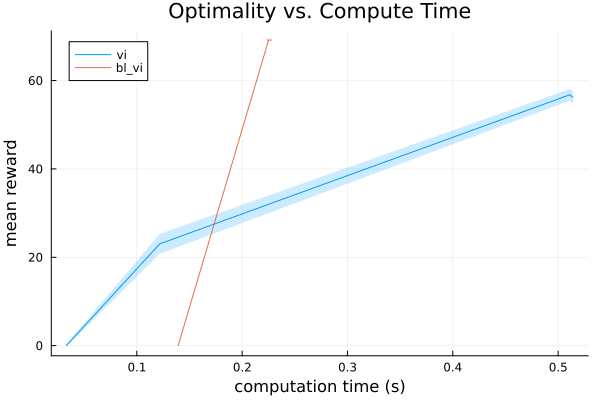

In [14]:
RoverWorld.plot_optimality_vs_compute(results, dir = dir)

## Testing LL

In [154]:
BiMDPs.test_LL()

passed
========== LLRoverWorldMDP ==========
grid_size: (20, 20)
max_time: 10
null_xy: (-1, -1)
p_transition: 1.0
γ: 0.95
current_tgt: ((5, 1), (1, 10), 50.0)
obstacles: [((3, 1), (1, 10), -5.0)]
exit_xys: Tuple{Int64, Int64}[]
init_state: BiMDPs.LLRoverWorld.LLState(2, 6, 1)
LL: in state BiMDPs.LLRoverWorld.LLState(2, 6, 1), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 5, 2), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 4, 3), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 3, 4), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(2, 2, 5), taking action RIGHT, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(3, 2, 6), taking action RIGHT, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(4, 2, 7), taking action DOWN, received reward 0
LL: in state BiMDPs.LLRoverWorld.LLState(4, 1, 8), taking action RIGHT, received reward 0
LL: in s

## Test HL MDP

In [167]:
using POMDPs
using DiscreteValueIteration
hl_mdp = BiMDPs.HighLevelMDP(rgw)
hl_solver = ValueIterationSolver(max_iterations=100)
hl_policy = solve(hl_solver, hl_mdp);

## View stepthrough of one HL policy

In [168]:
s0 = HLRoverWorld.HLState(6,7,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

4-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(6, 7, 1, Bool[0, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 9, Bool[0, 0]), a = BiMDPs.HLRoverWorld.HLAction(2), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 15, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 8, 20, Bool[1, 1]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)

In [169]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 100.0.


## Another example

In [172]:
s0 = HLRoverWorld.HLState(1,9,1,fill(false, length(rgw.tgts)))
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

6-element Vector{Any}:
 (s = BiMDPs.HLRoverWorld.HLState(1, 9, 1, Bool[0, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 16, Bool[0, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 50.0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 17, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 18, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 19, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)
 (s = BiMDPs.HLRoverWorld.HLState(9, 2, 20, Bool[1, 0]), a = BiMDPs.HLRoverWorld.HLAction(1), r = 0)

In [173]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 50.0.


## From a non-starting state

In [165]:
s0 = HLRoverWorld.HLState(9,8,10,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

Initial state BiMDPs.HLRoverWorld.HLState(9, 8, 10, Bool[0, 0, 0]) is out of bounds.


In [166]:
s0 = HLRoverWorld.HLState(9,7,9,Bool[0,0,0])
steps = HLRoverWorld.collect_stepthrough(hl_mdp, hl_policy, init_state = s0)

Initial state BiMDPs.HLRoverWorld.HLState(9, 7, 9, Bool[0, 0, 0]) is out of bounds.
